In [1]:
"""
This notebook will plot a scatter plot, which will show
        the relation between taste and environment
        ratings for crawled data from dianping.com.
"""

import bindings.frontend as ph
import json

host = raw_input("Please input the name of your host: ")
port = int(raw_input("Please input your port number: "))
minimum_ratings = int(raw_input("Please choose the minimum amount of ratings you would like the final sets of data to have: "))

ph.env.pyhusky_start(host, port, params={'disable_progress':True})


"""
Getting the data from the HDFS and formatting it:
    -The data will be filtered so that only relevant elements remain.
    -Then, it will be filtered according to the 'ratings' variable.
    -It will be then mapped in the following format:
        [(taste_rating, environment_rating), (taste_rating, environment_rating)...
    -Lastly, the outliers (bad data) will be removed.
"""
data = ph.env.load('/datasets/json/dianping.jl') \
    .map(lambda line:json.loads(line)) \
	.filter(lambda dict: (u'num_comments' in dict) and (dict[u'num_comments'] >= minimum_ratings)) \
	.map(lambda dict: (dict[u'taste'], dict[u'environment'])) \
    .filter(lambda pair: (pair[0] != 0) and (pair[1] != 0)) \
    .collect()

"""
data_x is our tuple of taste ratings.
data_y is our tuple of environment ratings.
"""
data_x = []
data_y = []

for pair in data:
    data_x.append(pair[0])
    data_y.append(pair[1])

# Freeing up the memory.
data = None
del data

Please input the name of your host: master
Please input your port number: 44443
Please choose the minimum amount of ratings you would like the final sets of data to have: 1000



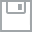
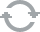
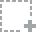
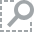
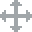
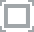
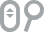
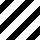
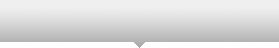
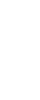
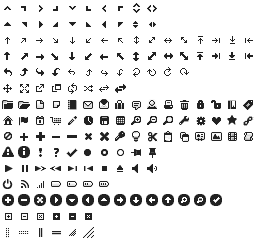
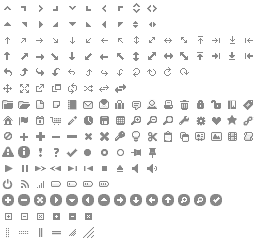
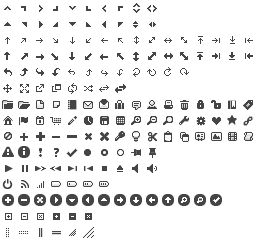
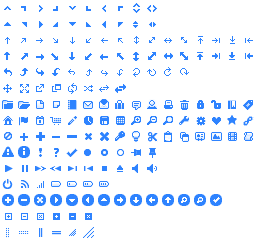
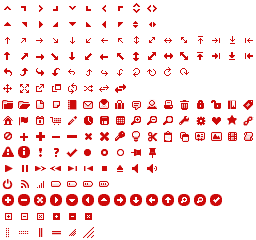
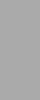
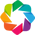
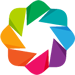

In [2]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.models import Range1d
output_notebook()

#uncomment to output data to local folder
#output_file("taste_environment_relation_scatter_plot.html")

p = figure(plot_width = 1024, plot_height = 1024)

p.circle(data_x, data_y, size = 10, color = "navy", alpha = 0.04)

p.x_range = Range1d(0, 10)
p.y_range = Range1d(0, 10)

p.title = 'Taste-environment relation for crawled data from dianping.com (at least ' + str(minimum_ratings) + ' ratings per restaurant)'
p.title_text_font_size = '14pt'
p.xaxis.axis_label = 'Taste rating'
p.yaxis.axis_label = 'Environment rating'

show(p)